In [2]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [3]:
# import pandas as pd
# import glob
# import os

# files = os.path.join("/Users/hitomihoshino/Documents/DS/salesforce/","scrape*.csv")
# files = glob.glob(files)

# df = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [7]:
df = pd.read_csv('glassdoor1-120.csv')
df.drop(columns = ['Unnamed: 0'], inplace =True)

In [8]:
df.columns

Index(['title', 'author_info', 'rating', 'pros', 'cons', 'helpful'], dtype='object')

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(1036, 6)

In [11]:
df.columns

Index(['title', 'author_info', 'rating', 'pros', 'cons', 'helpful'], dtype='object')

# Pros

In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

### Tokenization

In [14]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

### Removing special chars

In [15]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Pros']=df['Pros'].apply(remove_special_characters)

KeyError: 'Pros'

### Text stemming 

In [ ]:
# #Stemming the text
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
# #Apply function on review column
# df['Pros']=df['Pros'].apply(simple_stemmer)

### Text Lemmatizing

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['Pros']=df['Pros'].apply(lemmatize_text)


### Removing stopwords

In [16]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Pros']=df['Pros'].apply(remove_stopwords)

{'ll', "couldn't", 'because', 'myself', 'on', 'was', 'didn', "you've", 'all', 'below', "don't", 'aren', 'in', 'hers', 'now', 'y', 'themselves', 'such', 'few', 'no', "hadn't", "you'll", 'weren', 'its', 'out', 'off', 'ourselves', "you're", 'very', 'further', 'own', 'mightn', 'against', 'then', 'theirs', 'wasn', "wasn't", 't', 'for', 'their', 'do', 'i', "shan't", 'about', 'not', 're', 'doesn', 'by', 'while', 'them', 'm', 'at', 'can', 'my', 'so', 'over', 'where', 'but', 'needn', 'being', 'or', 'shan', 'these', 'between', 'are', 'does', "she's", 'once', 'from', "didn't", 'mustn', "shouldn't", 'has', 'until', 'during', "should've", 'too', 'how', "won't", 'isn', 'and', 'am', 'yourselves', 'o', 'be', 'will', 'who', 'same', 's', "haven't", 'those', 'shouldn', 've', 'this', "doesn't", 'there', 'were', "it's", 'whom', 'why', 'down', 'here', 'just', 'with', 'which', 'that', 'if', "wouldn't", 'our', 'each', "mustn't", "mightn't", 'both', 'nor', 'some', "weren't", 'what', 'itself', 'is', 'they', 'wo

KeyError: 'Pros'

In [28]:
df.rename(columns = {'pros':'Pros', 'cons':'Cons', 'helpful':'Helpful'}, inplace = True)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


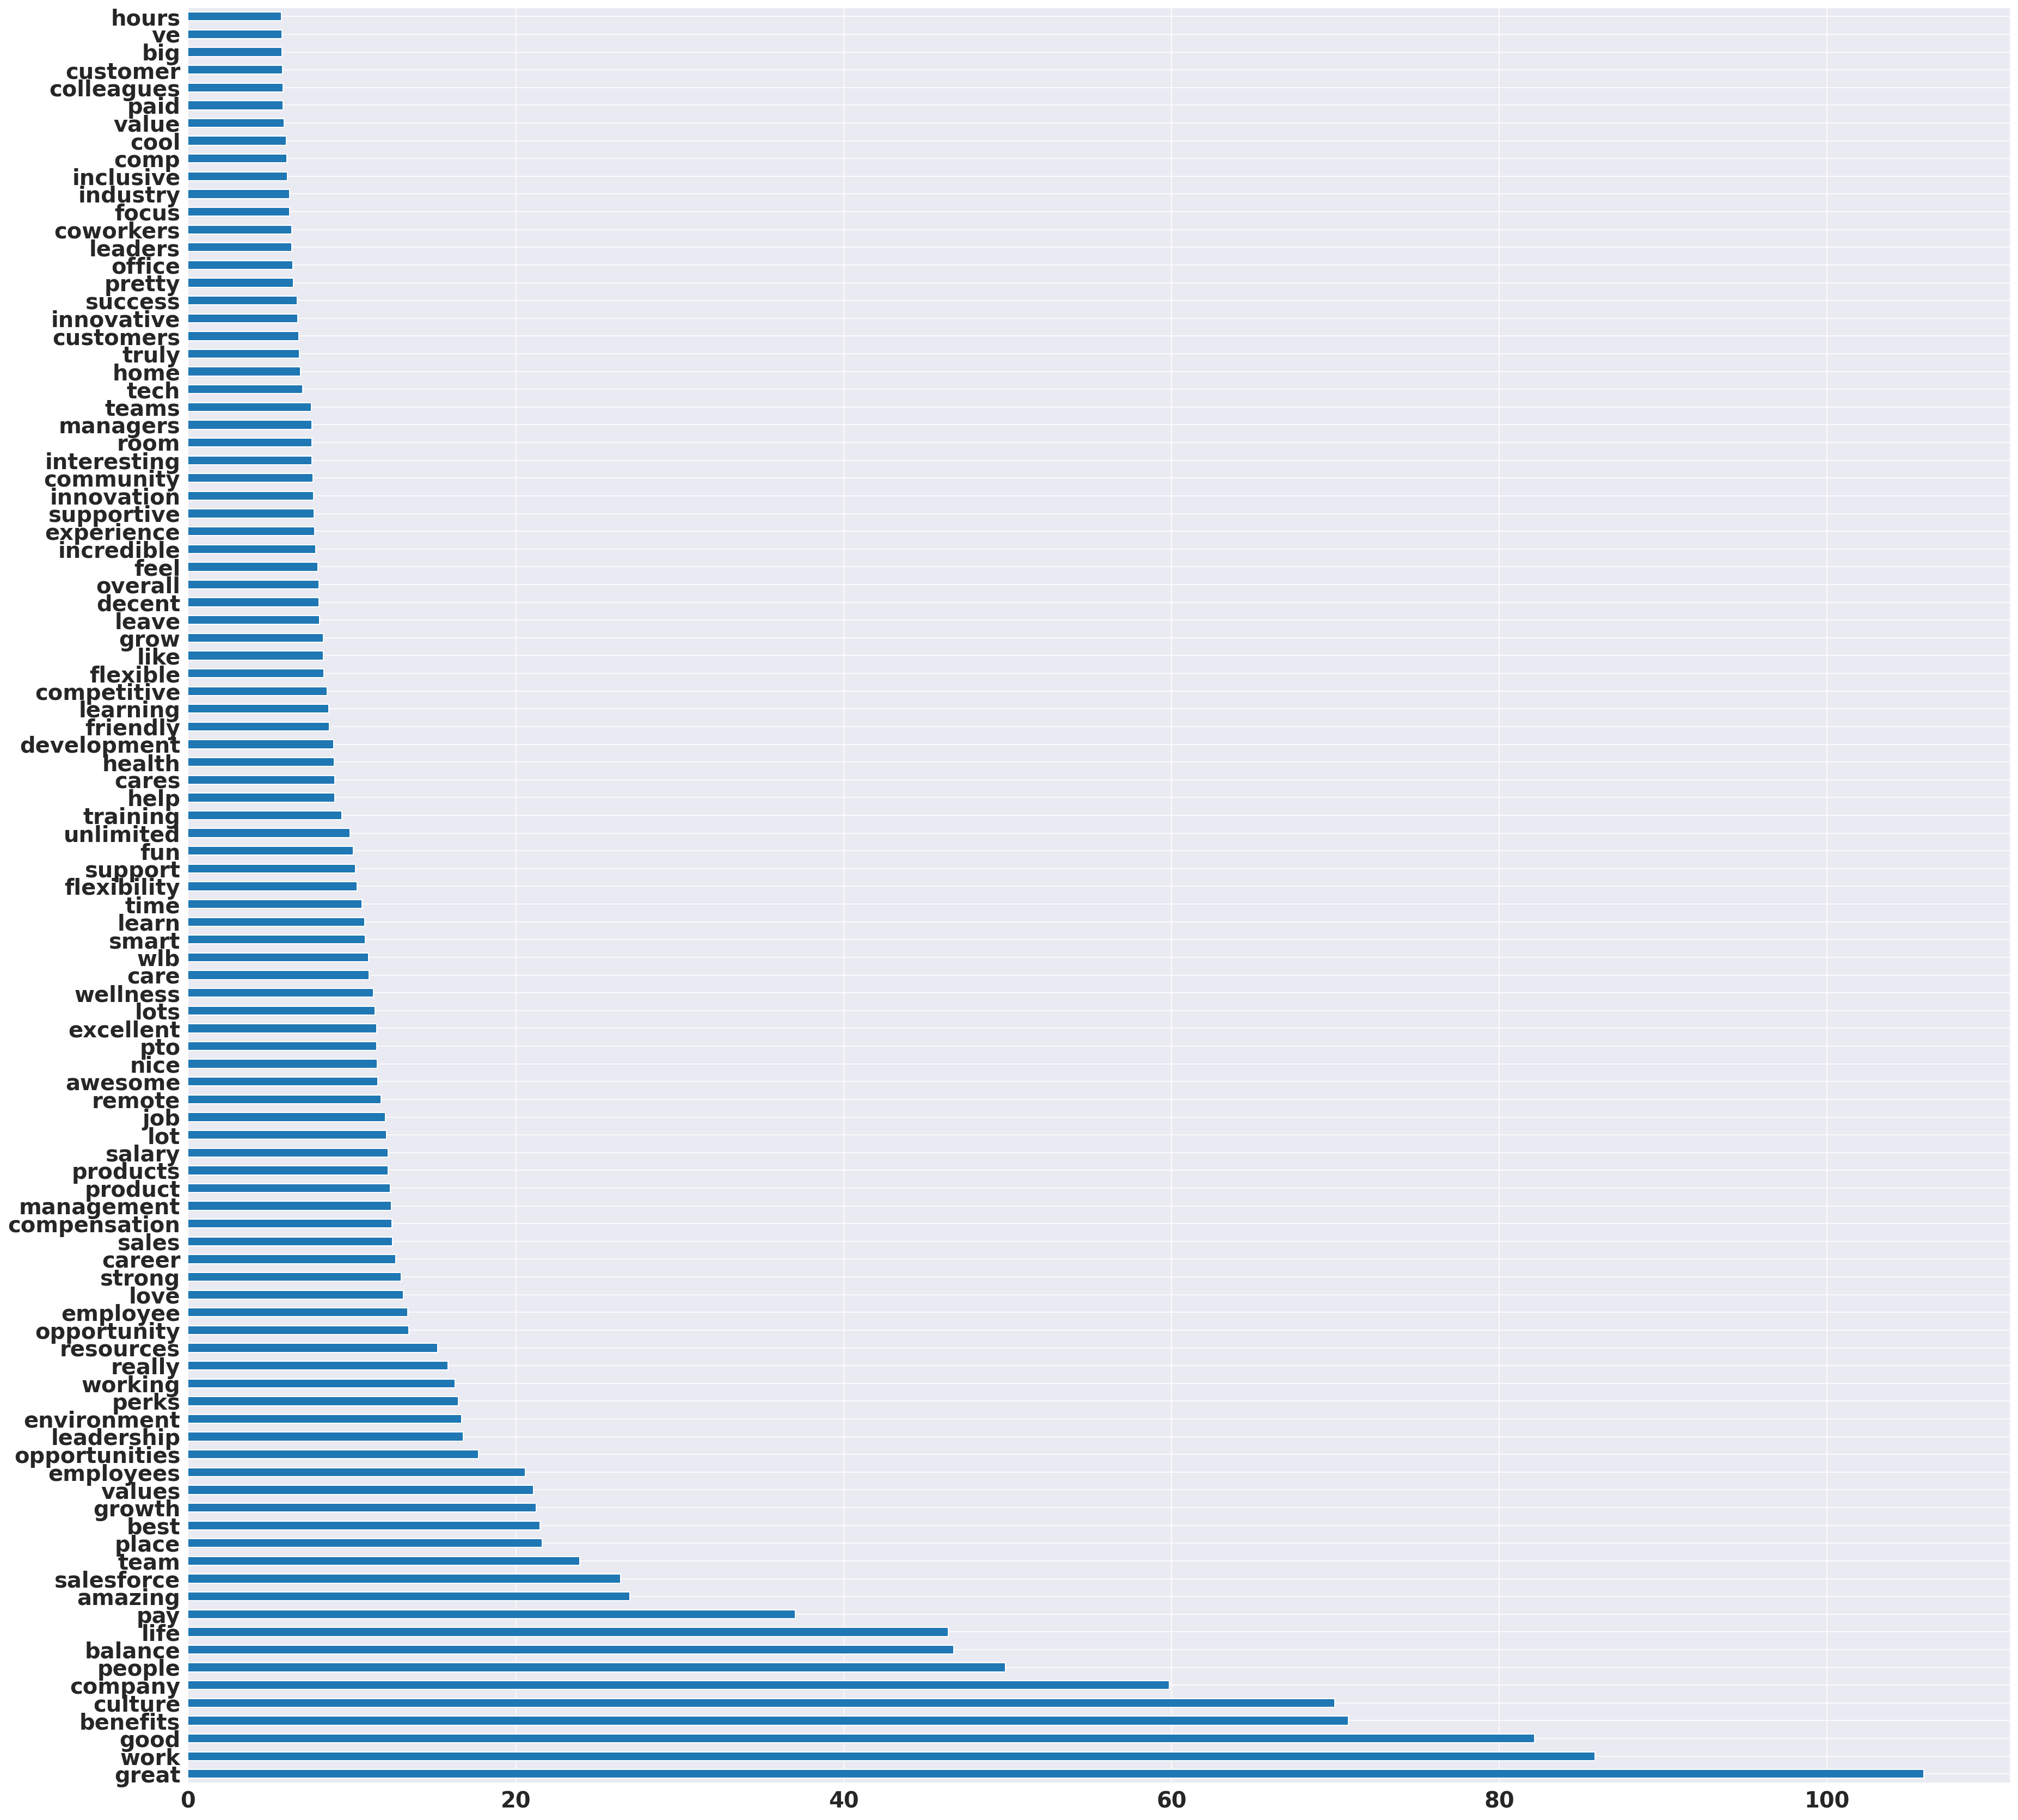

In [29]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df['Pros'])

pro_tf = tf.transform(df['Pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

Figure(432x288)


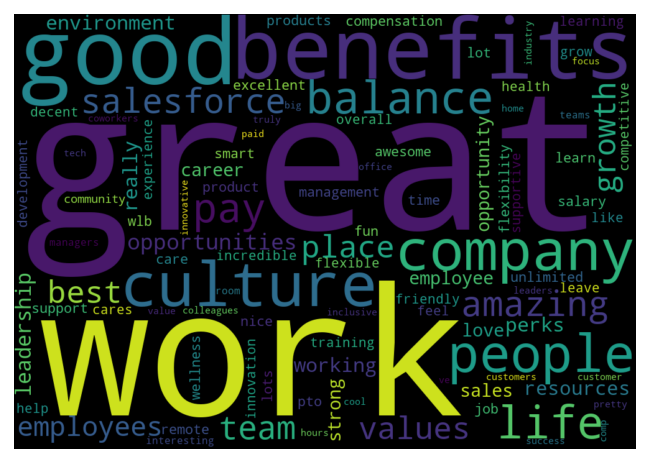

In [30]:
fig, ax = plt.subplots(1,1)
# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

### Bigram

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)
Figure(432x288)


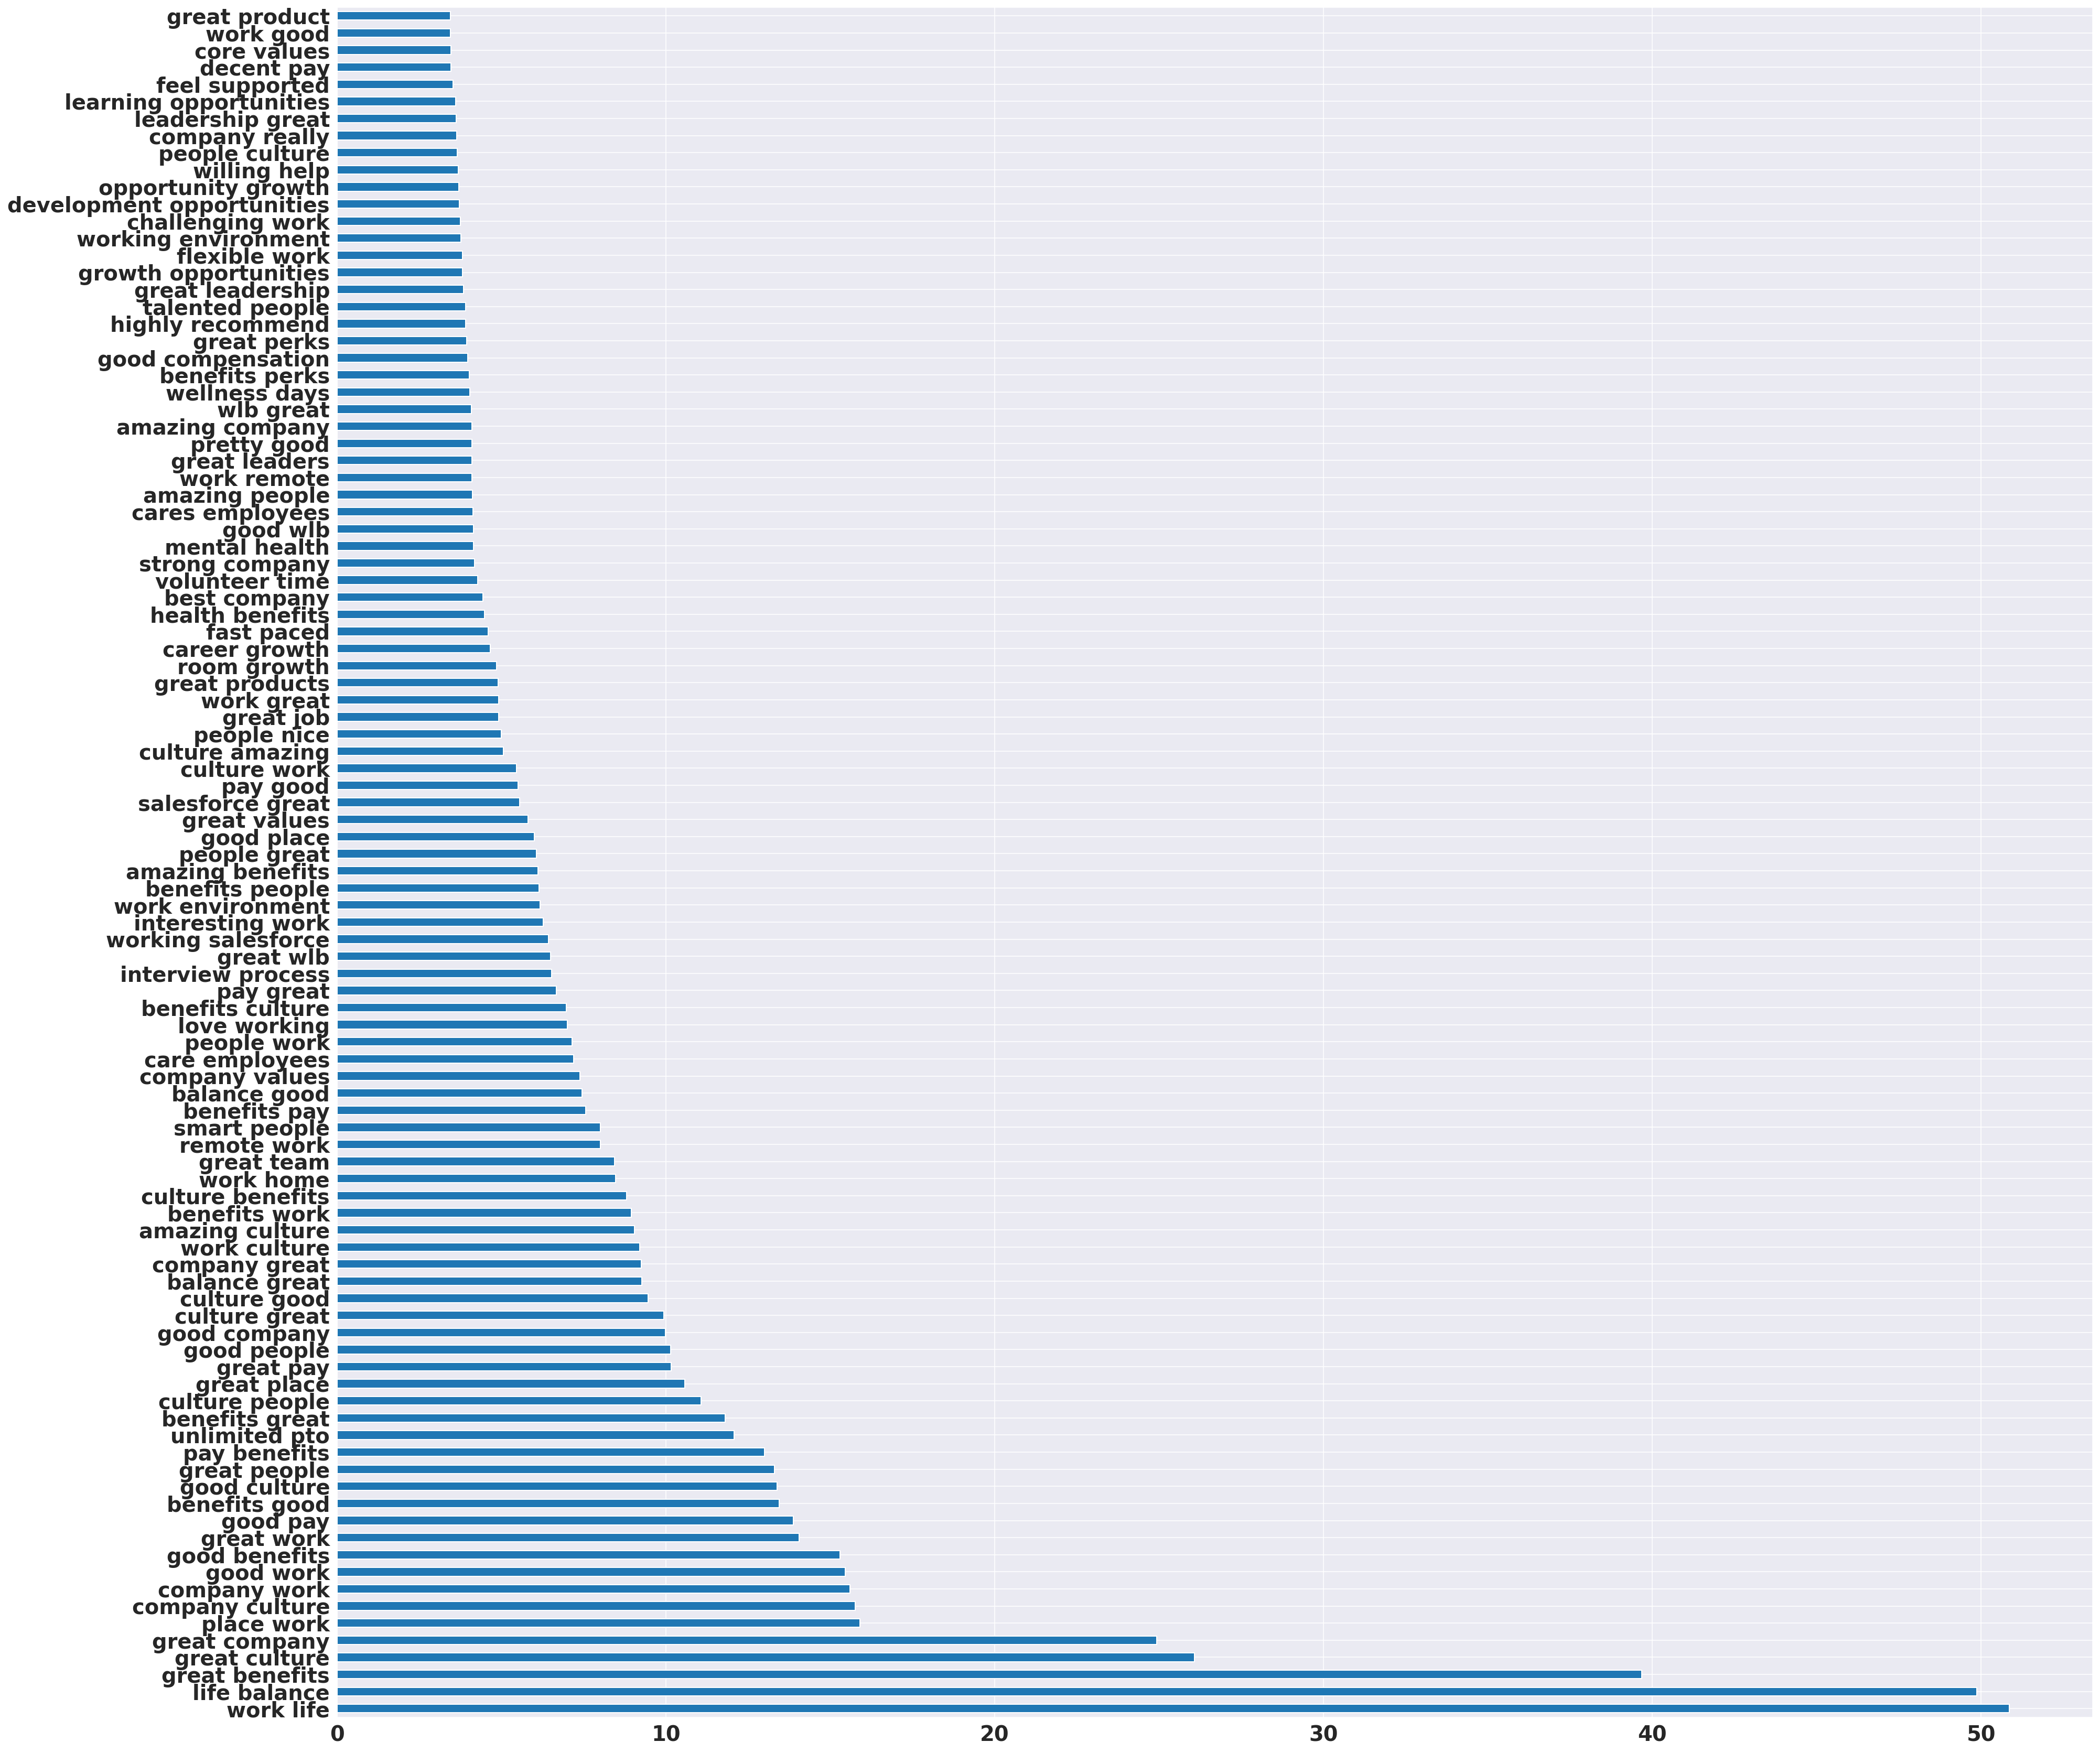

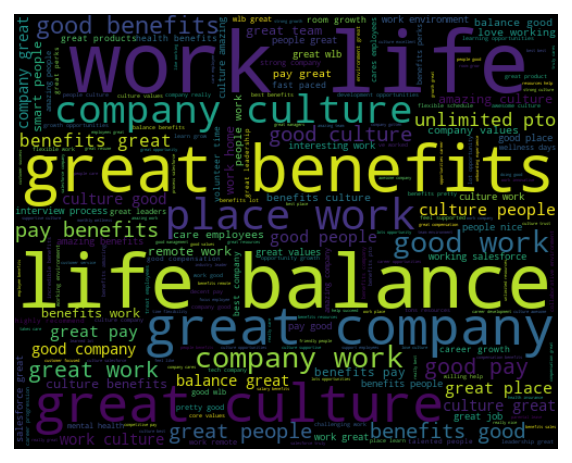

In [31]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range=(2,2))
tf.fit(df['Pros'])

pro_tf = tf.transform(df['Pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

fig, ax = plt.subplots()
# Create and generate a word cloud image:
Cloud = WordCloud(width=500, height=400,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts)

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")

print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)
Figure(432x288)


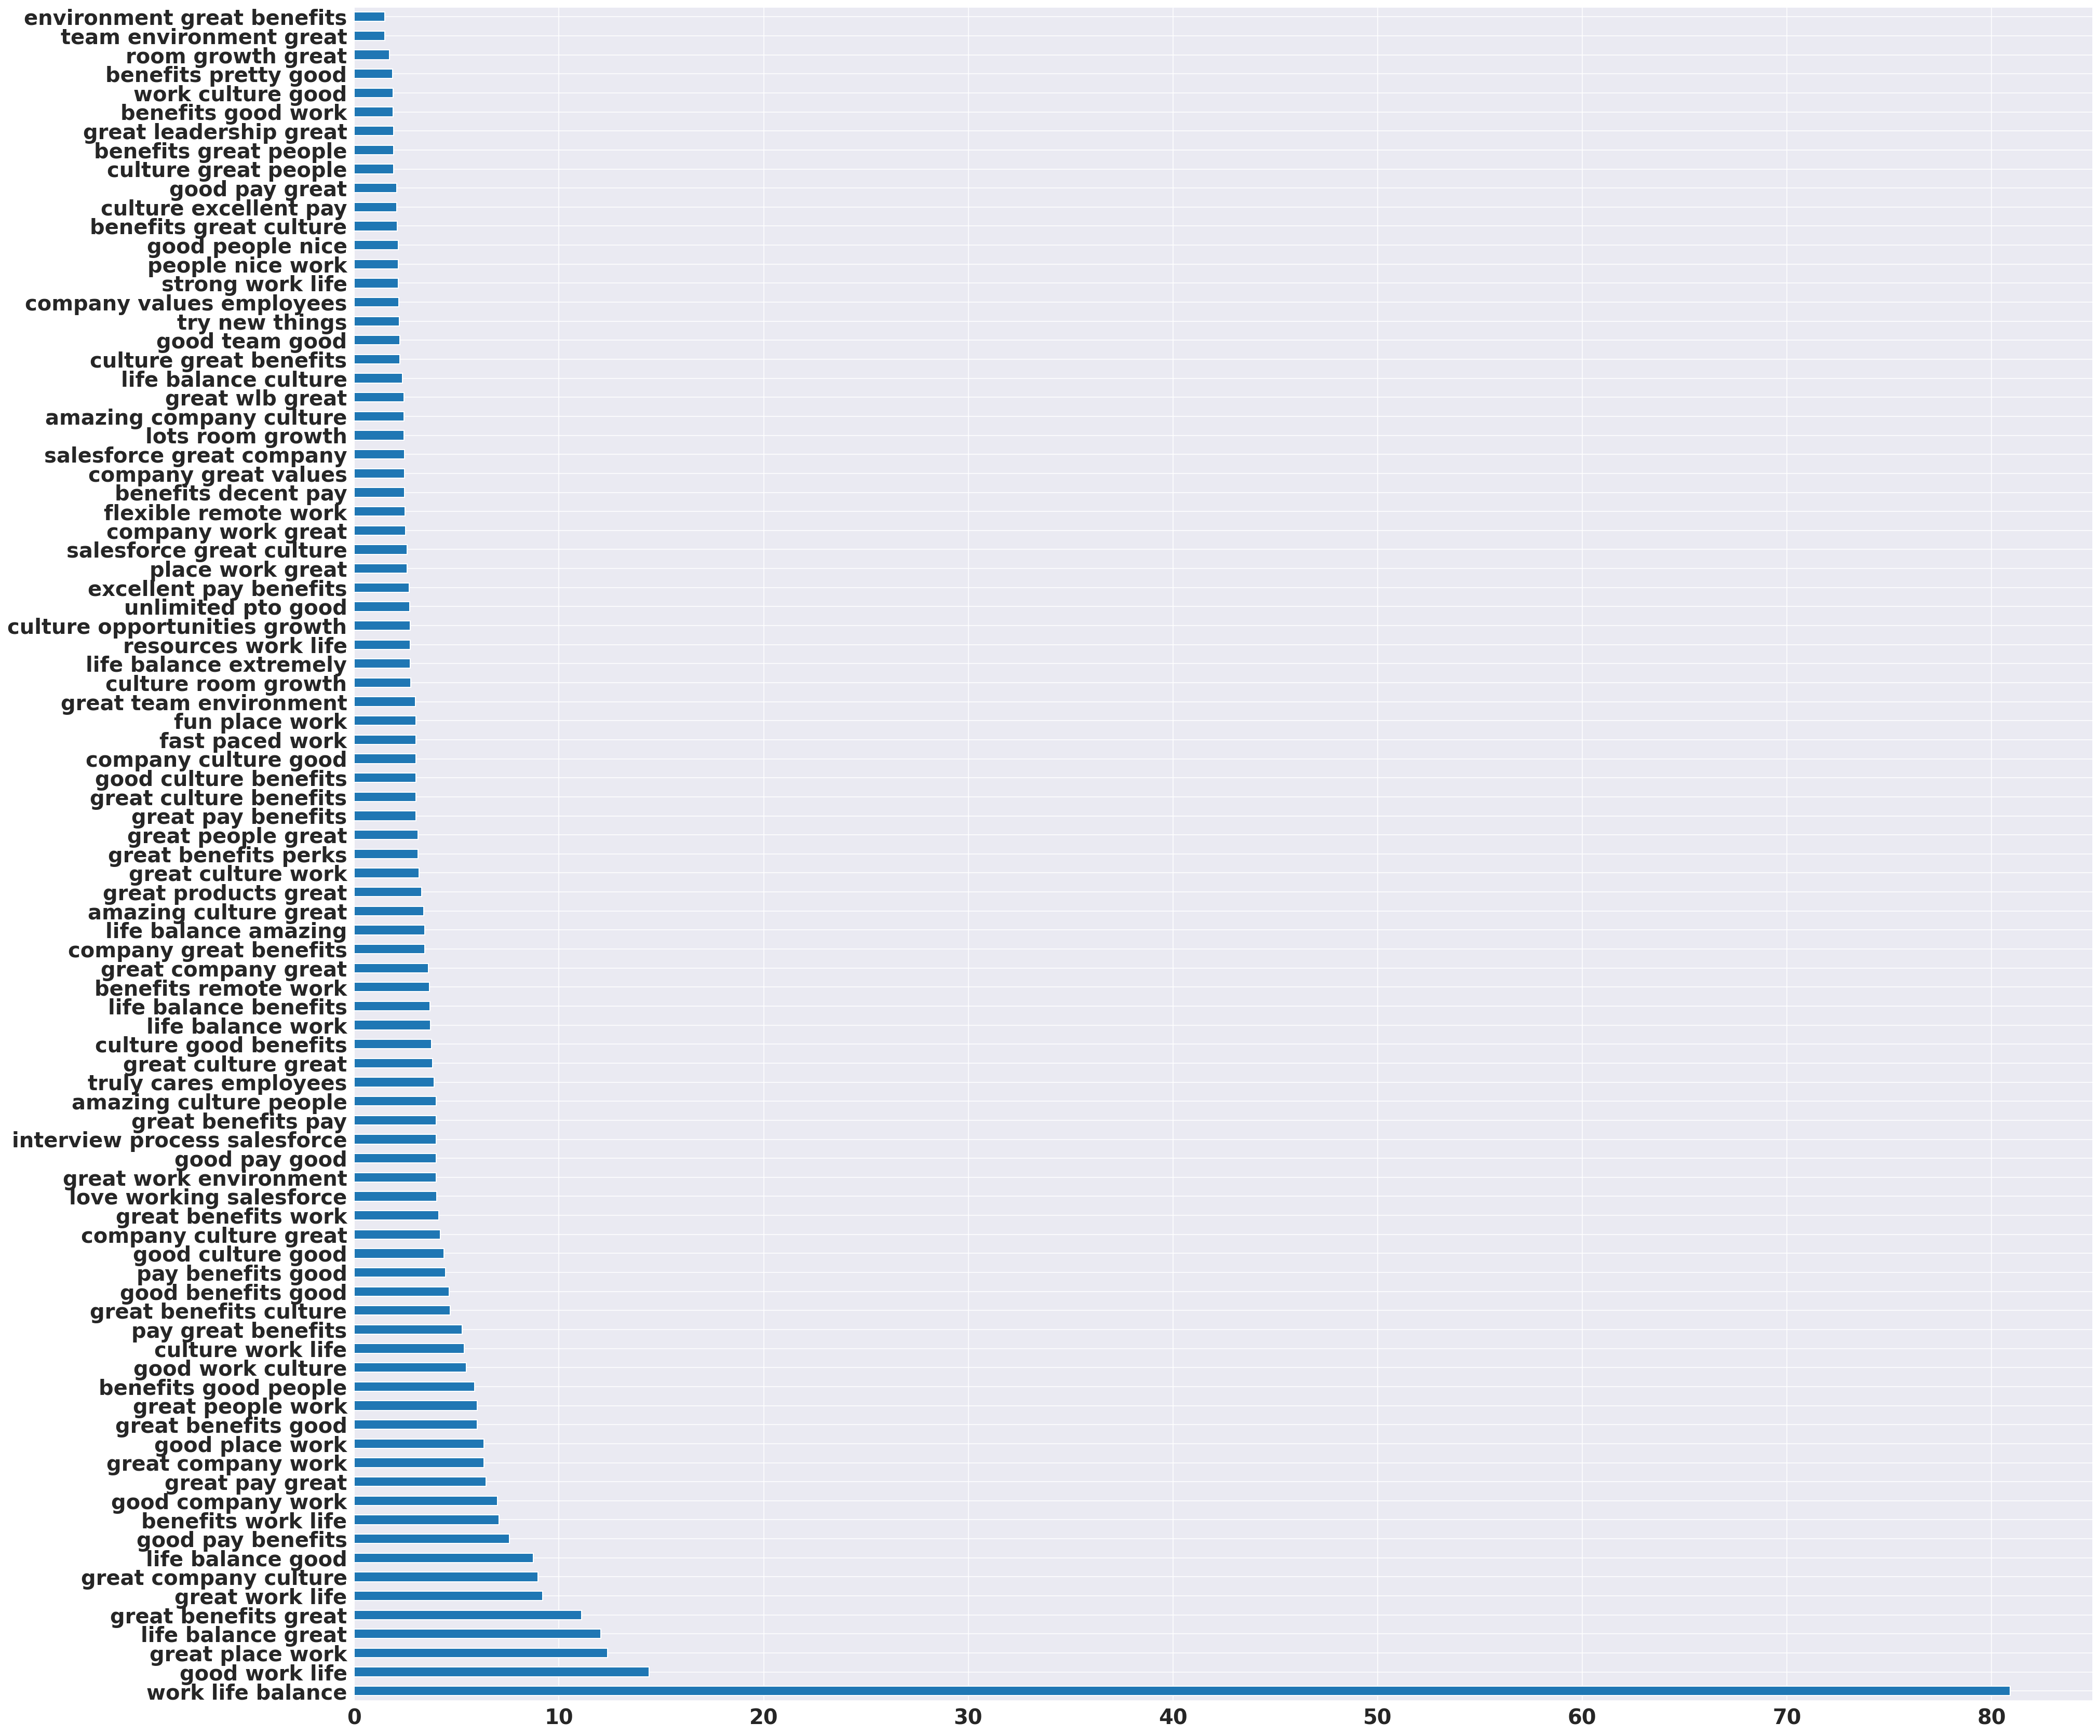

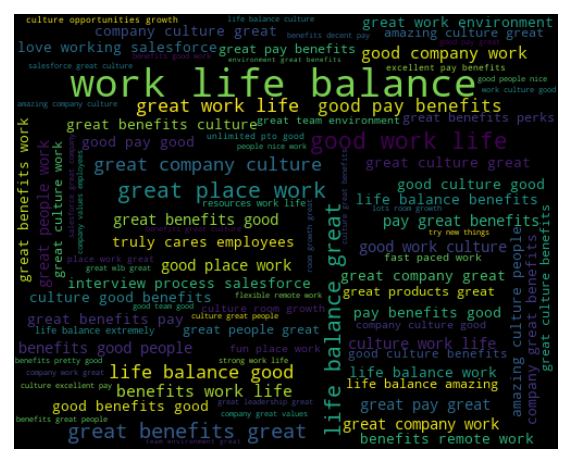

In [32]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range=(3,3))
tf.fit(df['Pros'])

pro_tf = tf.transform(df['Pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

fig, ax = plt.subplots()
# Create and generate a word cloud image:
Cloud = WordCloud(width=500, height=400,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts)

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)